# Dataset Creation

In [1]:
!gdown https://drive.google.com/u/0/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M
To: /content/WIDER_train.zip
100% 1.47G/1.47G [00:18<00:00, 79.5MB/s]


In [2]:
!gdown https://drive.google.com/u/0/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q
To: /content/WIDER_val.zip
100% 363M/363M [00:05<00:00, 68.2MB/s]


In [3]:
!wget http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip

--2022-08-31 12:57:52--  http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip
Resolving shuoyang1213.me (shuoyang1213.me)... 192.30.252.153, 192.30.252.154
Connecting to shuoyang1213.me (shuoyang1213.me)|192.30.252.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3591642 (3.4M) [application/zip]
Saving to: ‘wider_face_split.zip’

wider_face_split.zi 100%[===================>]   3.42M  7.61MB/s    in 0.5s    

2022-08-31 12:57:52 (7.61 MB/s) - ‘wider_face_split.zip’ saved [3591642/3591642]



In [4]:
!unzip -qx /content/WIDER_train.zip
!unzip -qx /content/WIDER_val.zip
!unzip -qx /content/wider_face_split.zip

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob as g
import cv2
from tqdm.notebook import tqdm
from shutil import copy, move

In [6]:
# Validation Data
new_imgs_dir = '/content/newDataset/images/val'
new_lbls_dir = '/content/newDataset/labels/val'
img_address = '/content/WIDER_val/images'
label_text_name = '/content/wider_face_split/wider_face_val_bbx_gt.txt'

os.makedirs(new_imgs_dir, exist_ok = True)
os.makedirs(new_lbls_dir, exist_ok = True)

annots = open(label_text_name)
lines = annots.readlines() #All lines in my gt_bbx file

names = [x for x in lines if 'jpg' in x]
indices = [lines.index(x) for x in names]

for n in tqdm(range(len(names))):
  i = indices[n]
  name = lines[i].rstrip()
  old_img_path = os.path.join(img_address , name)

  name = os.path.split(name)[-1]
  img_path = os.path.join(new_imgs_dir, name)  # New image path
  label_path = os.path.join(new_lbls_dir, name.split('.')[0] + '.txt' )
  num_objs = int(lines[i+1].rstrip())
  bboxes = lines[i+2 : i+2+num_objs]
  bboxes = [x.rstrip() for x in bboxes]
  bboxes = [x.split()[:4] for x in bboxes]

  img = cv2.imread(old_img_path)
  img_h, img_w, _ = img.shape

  f = open(label_path, 'w')
  for bbx in bboxes:
    x1 = int(bbx[0])
    y1 = int(bbx[1])
    w  = int(bbx[2])
    h  = int(bbx[3])

    # YOLO Format
    x = (x1 + w//2) / img_w
    y = (y1 + h//2) / img_h
    w = w / img_w
    h = h / img_h

    yolo_line = f'{0} {x} {y} {w} {h}\n'
    f.write(yolo_line)
  f.close()
  copy(old_img_path, img_path)

  0%|          | 0/3226 [00:00<?, ?it/s]

In [7]:
# Training Data
new_imgs_dir = '/content/newDataset/images/train'
new_lbls_dir = '/content/newDataset/labels/train'
img_address = '/content/WIDER_train/images'
label_text_name = '/content/wider_face_split/wider_face_train_bbx_gt.txt'

os.makedirs(new_imgs_dir, exist_ok = True)
os.makedirs(new_lbls_dir, exist_ok = True)

annots = open(label_text_name)
lines = annots.readlines() #All lines in my gt_bbx file

names = [x for x in lines if 'jpg' in x]
indices = [lines.index(x) for x in names]

for n in tqdm(range(len(names))):
  i = indices[n]
  name = lines[i].rstrip()
  old_img_path = os.path.join(img_address , name)

  name = os.path.split(name)[-1]
  img_path = os.path.join(new_imgs_dir, name)  # New image path
  label_path = os.path.join(new_lbls_dir, name.split('.')[0] + '.txt' )
  num_objs = int(lines[i+1].rstrip())
  bboxes = lines[i+2 : i+2+num_objs]
  bboxes = [x.rstrip() for x in bboxes]
  bboxes = [x.split()[:4] for x in bboxes]

  img = cv2.imread(old_img_path)
  img_h, img_w, _ = img.shape

  f = open(label_path, 'w')
  for bbx in bboxes:
    x1 = int(bbx[0])
    y1 = int(bbx[1])
    w  = int(bbx[2])
    h  = int(bbx[3])

    # YOLO Format
    x = (x1 + w//2) / img_w
    y = (y1 + h//2) / img_h
    w = w / img_w
    h = h / img_h

    yolo_line = f'{0} {x} {y} {w} {h}\n'
    f.write(yolo_line)
  f.close()
  copy(old_img_path, img_path)

  0%|          | 0/12880 [00:00<?, ?it/s]

# Check Dataset

In [8]:
names = g('/content/newDataset/labels/*/*txt')

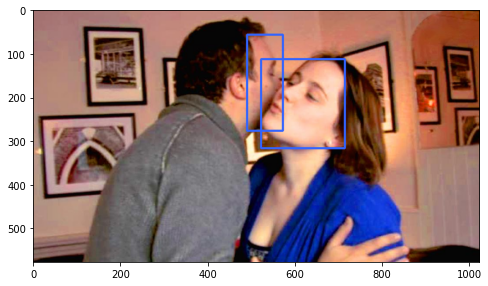

In [9]:
n = np.random.randint(0, len(names))
f = open(names[n])
lines = f.readlines()
classes = [int(x.split()[0]) for x in lines]
lines = [x.rstrip() for x in lines]
objects = [x.split()[1:] for x in lines]
img = cv2.imread(names[n].replace('txt','jpg').replace('labels','images'))
img_h, img_w, _ = img.shape
color = (255,100,50)
for bbox in objects:
  x = float(bbox[0]) * img_w
  y = float(bbox[1]) * img_h
  w = float(bbox[2]) * img_w
  h = float(bbox[3]) * img_h
  cv2.rectangle(img, (int(x-w/2) , int(y - h/2)) , (int(x+w/2) , int(y + h/2)), color , 4)

plt.figure(figsize = (8,8))
plt.imshow(img[:,:,::-1])

# Training Yolo

In [10]:
!git clone https://github.com/ultralytics/yolov5  # clone repo

Cloning into 'yolov5'...
remote: Enumerating objects: 12122, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 12122 (delta 39), reused 52 (delta 26), pack-reused 12047
Receiving objects: 100% (12122/12122), 12.59 MiB | 1.44 MiB/s, done.
Resolving deltas: 100% (8327/8327), done.


In [11]:
%cd /content/yolov5

/content/yolov5


In [12]:
!pip install -r requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.8 MB/s 


In [ ]:
!python train.py\
 --img 640 --batch 16\
  --epochs 2 --data /content/yolov5/data/WiderFace.yaml\
   --weights yolov5s.pt\
    --cfg yolov5s.yaml

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=/content/yolov5/data/WiderFace.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=2, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-78-g5f1000a Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, h